In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import copy
import math
import seaborn as sns
from copy import deepcopy

In [2]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
def_figsize = 56, 20
#rcParams['figure.figsize'] = 28, 20

plt.style.use('seaborn-paper')
sns.set(context='paper', font_scale=1.6)
sns.set_style("whitegrid")
sns.set_palette(sns.xkcd_palette(['black', 'greyish']))

SMALL_SIZE = 40
MEDIUM_SIZE = 40
BIGGER_SIZE = 40
#
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

# 1 Ot_approx and Ot

/home/wings/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


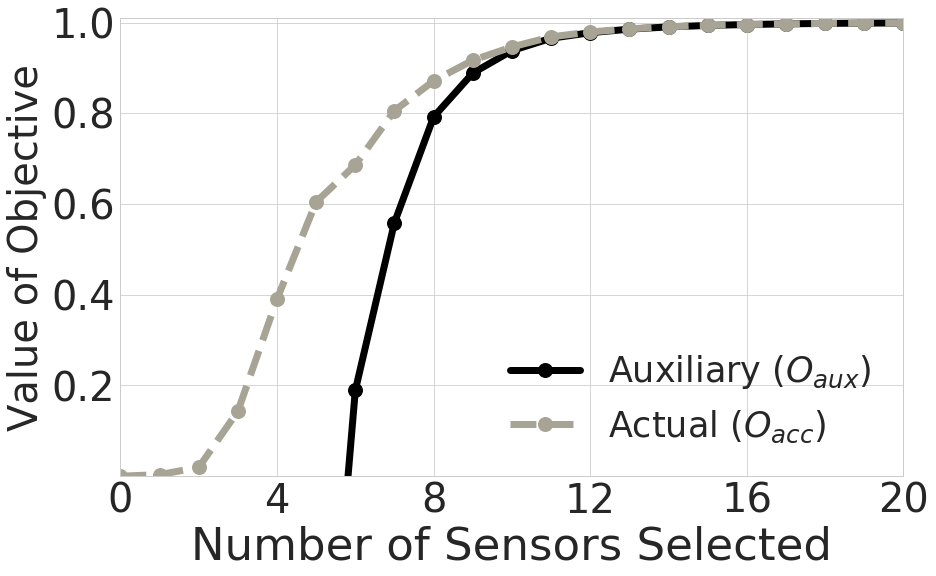

In [6]:
df = pd.read_csv('fig1-homo/AGA', header=None)

X1, Y1 = df[0].tolist(), df[1].tolist()   # Ot_approx
X2, Y2 = df[0].tolist(), df[2].tolist()   # Ot_real

X2.insert(0, 0)
Y2.insert(0, 0)

rcParams['lines.linewidth'] = 7

plt.figure(figsize=(14,9))
#plt.setp(linewidth=4)
plt.plot(X1, Y1, linestyle='-', marker='o', markersize=15)
plt.plot(X2, Y2, linestyle='--', marker='o', markersize=15)

plt.legend(['Auxiliary ($O_{aux}$)','Actual ($O_{acc})$'], prop={'size':35})
plt.xlabel('Number of Sensors Selected', fontsize=45)
plt.ylabel('Value of Objective', fontsize=40)
x_axis = np.arange(0, 21, 4)
plt.xticks(x_axis)
y_axis = np.arange(0.2, 1.1, 0.2)
plt.yticks(y_axis)
plt.xlim([0, 20])
plt.ylim([0, 1.01])

plt.savefig('fig1-homo/Ot-approx-real.png')
plt.show()

# 2 Homo, AGA against baseline

/home/wings/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


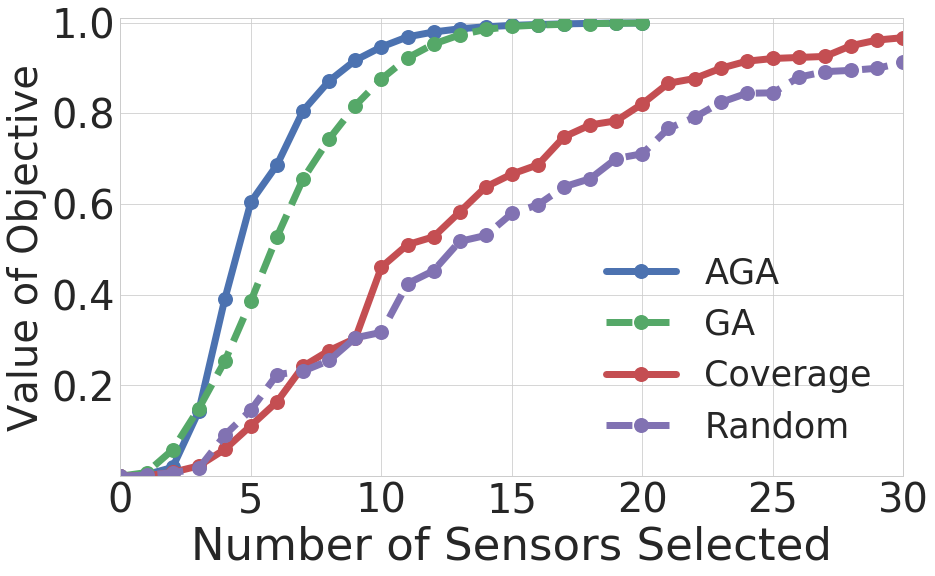

In [26]:
rcParams.update({'figure.autolayout': True})
def_figsize = 56, 20

plt.style.use('seaborn-paper')
sns.set(context='paper', font_scale=1.6)
sns.set_style("whitegrid")

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

df = pd.read_csv('fig1-homo/AGA', header=None)
X1, Y1 = df[0].tolist(), df[2].tolist()         # Y1: AGA

df = pd.read_csv('fig1-homo/GA', header=None)
X2, Y2 = df[0].tolist(), df[1].tolist()         # Y2: GA

df = pd.read_csv('fig1-homo/coverage', header=None)
X3, Y3 = df[0].tolist(), df[1].tolist()         # Y3: coverage

df = pd.read_csv('fig1-homo/random', header=None)
X4, Y4 = df[0].tolist(), df[1].tolist()         # Y4: random

X1.insert(0, 0), Y1.insert(0, 0)
X2.insert(0, 0), Y2.insert(0, 0)
X3.insert(0, 0), Y3.insert(0, 0)
X4.insert(0, 0), Y4.insert(0, 0)

rcParams['lines.linewidth'] = 7

plt.figure(figsize=(14,9))
#plt.setp(linewidth=4)
plt.plot(X1, Y1, linestyle='-', marker='o', markersize=15)
plt.plot(X2, Y2, linestyle='--', marker='o', markersize=15)
plt.plot(X3, Y3, linestyle='-', marker='o', markersize=15)
plt.plot(X4, Y4, linestyle='--', marker='o', markersize=15)

plt.legend(['AGA','GA', 'Coverage', 'Random'], prop={'size':35})
plt.xlabel('Number of Sensors Selected', fontsize=45)
plt.ylabel('Value of Objective', fontsize=40)
x_axis = np.arange(0, 31, 5)
plt.xticks(x_axis)
y_axis = np.arange(0.2, 1.1, 0.2)
plt.yticks(y_axis)
plt.xlim([0, 30])
plt.ylim([0, 1.01])

plt.savefig('fig1-homo/AGA-vs-baseline.png')
plt.show()

# 3 AGA against Optimal and other baselines in small settings

In [54]:
file = 'fig2-homo-small/AGA{}'
df_temp = pd.read_csv(file.format(1), header=None)
concat = np.array([df_temp[2]])
for i in range(2, 11):
    df_temp = pd.read_csv(file.format(i), header=None)
    ar_temp = np.array([df_temp[2]])
    concat = np.concatenate((concat, ar_temp), axis=0)
AGA_mean = list(concat.mean(axis=0))
AGA_std  = list(concat.std(axis=0))
AGA_mean.insert(0, 0)
AGA_std.insert(0, 0)

In [55]:
file = 'fig2-homo-small/GA{}'
df_temp = pd.read_csv(file.format(1), header=None)
concat = np.array([df_temp[1]])
for i in range(2, 11):
    df_temp = pd.read_csv(file.format(i), header=None)
    ar_temp = np.array([df_temp[1]])
    concat = np.concatenate((concat, ar_temp), axis=0)
GA_mean = list(concat.mean(axis=0))
GA_std  = list(concat.std(axis=0))
GA_mean.insert(0, 0)
GA_std.insert(0, 0)

In [89]:
file = 'fig2-homo-small/optimal{}'
df_temp = pd.read_csv(file.format(1), header=None)
concat = np.array([df_temp[1]])
for i in range(2, 11):
    df_temp = pd.read_csv(file.format(i), header=None)
    ar_temp = np.array([df_temp[1]])
    concat = np.concatenate((concat, ar_temp), axis=0)
opt_mean = list(concat.mean(axis=0))
opt_std  = list(concat.std(axis=0))
opt_mean.insert(0, 0)
opt_std.insert(0, 0)

In [80]:
file = 'fig2-homo-small/random{}'
df_temp = pd.read_csv(file.format(1), header=None)
concat = np.array([df_temp[1]])
for i in range(2, 11):
    df_temp = pd.read_csv(file.format(i), header=None)
    ar_temp = np.array([df_temp[1]])
    concat = np.concatenate((concat, ar_temp), axis=0)
random_mean = list(concat.mean(axis=0))
random_std  = list(concat.std(axis=0))
random_mean.insert(0, 0)
random_std.insert(0, 0)

In [73]:
file = 'fig2-homo-small/coverage{}'
df_temp = pd.read_csv(file.format(1), header=None)
concat = np.array([df_temp[1]])
for i in range(2, 11):
    df_temp = pd.read_csv(file.format(i), header=None)
    ar_temp = np.array([df_temp[1]])
    concat = np.concatenate((concat, ar_temp), axis=0)
coverage_mean = list(concat.mean(axis=0))
coverage_std  = list(concat.std(axis=0))
coverage_mean.insert(0, 0)
coverage_std.insert(0, 0)

/home/wings/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


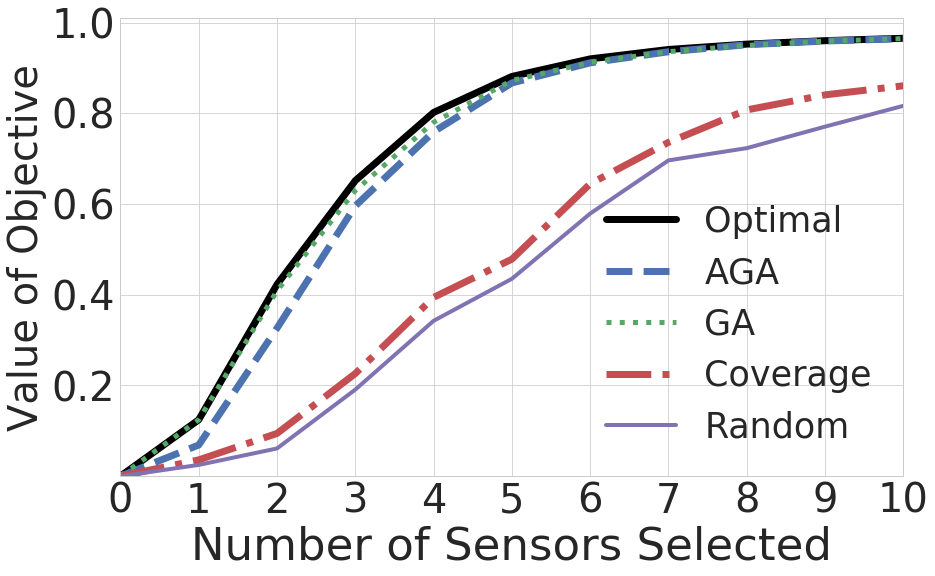

In [93]:
rcParams.update({'figure.autolayout': True})
def_figsize = 56, 20

plt.style.use('seaborn-paper')
sns.set(context='paper', font_scale=1.6)
sns.set_style("whitegrid")

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

X = list(range(0, 11))

rcParams['lines.linewidth'] = 7

plt.figure(figsize=(14,9))
#plt.setp(linewidth=4)
plt.plot(X, opt_mean, linestyle='-', color='black')
plt.plot(X, AGA_mean, linestyle='--')
plt.plot(X, GA_mean,  linestyle=':', linewidth=5)
plt.plot(X, coverage_mean, linestyle='-.')
plt.plot(X, random_mean, linestyle='-', linewidth=4)

plt.legend(['Optimal', 'AGA', 'GA', 'Coverage', 'Random'], prop={'size':35})
plt.xlabel('Number of Sensors Selected', fontsize=45)
plt.ylabel('Value of Objective', fontsize=40)
x_axis = np.arange(0, 11, 1)
plt.xticks(x_axis)
y_axis = np.arange(0.2, 1.1, 0.2)
plt.yticks(y_axis)
plt.xlim([0, 10])
plt.ylim([0, 1.01])

plt.savefig('fig2-homo-small/AGA-vs-optimal.png')
plt.show()

# 4 Total # of Sensors

/home/wings/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


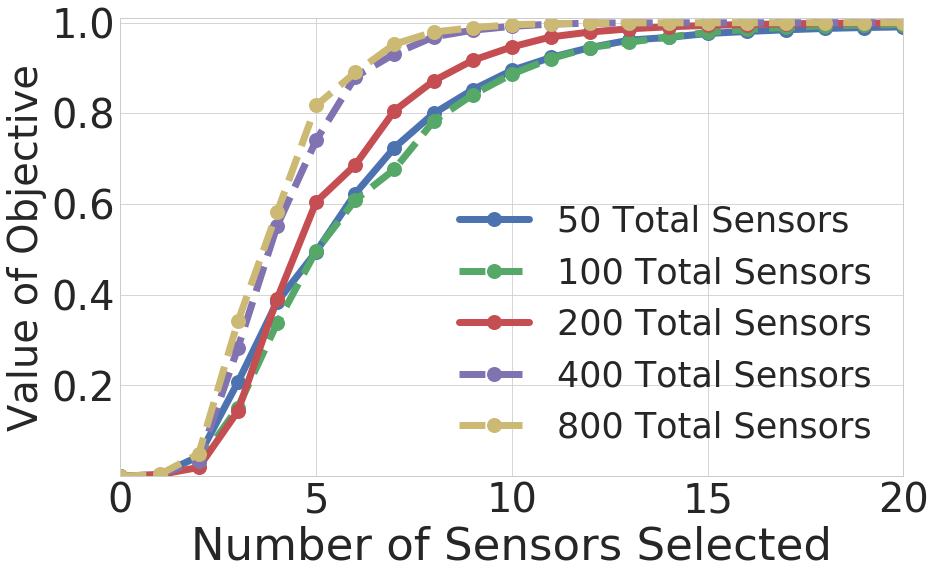

In [34]:
rcParams.update({'figure.autolayout': True})
def_figsize = 56, 20

plt.style.use('seaborn-paper')
sns.set(context='paper', font_scale=1.6)
sns.set_style("whitegrid")

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

df = pd.read_csv('fig4-homo-total-sensors/50-sensors', header=None)
X1, Y1 = df[0].tolist(), df[2].tolist()         # Y1: AGA

df = pd.read_csv('fig4-homo-total-sensors/100-sensors', header=None)
X2, Y2 = df[0].tolist(), df[2].tolist()         # Y2: GA

df = pd.read_csv('fig4-homo-total-sensors/200-sensors', header=None)
X3, Y3 = df[0].tolist(), df[2].tolist()         # Y3: coverage

df = pd.read_csv('fig4-homo-total-sensors/400-sensors', header=None)
X4, Y4 = df[0].tolist(), df[2].tolist()         # Y4: random

df = pd.read_csv('fig4-homo-total-sensors/800-sensors', header=None)
X5, Y5 = df[0].tolist(), df[2].tolist()         # Y4: random

X1.insert(0, 0), Y1.insert(0, 0)
X2.insert(0, 0), Y2.insert(0, 0)
X3.insert(0, 0), Y3.insert(0, 0)
X4.insert(0, 0), Y4.insert(0, 0)
X5.insert(0, 0), Y5.insert(0, 0)

rcParams['lines.linewidth'] = 7

plt.figure(figsize=(14,9))
#plt.setp(linewidth=4)
plt.plot(X1, Y1, linestyle='-', marker='o', markersize=15)
plt.plot(X2, Y2, linestyle='--', marker='o', markersize=15)
plt.plot(X3, Y3, linestyle='-', marker='o', markersize=15)
plt.plot(X4, Y4, linestyle='--', marker='o', markersize=15)
plt.plot(X5, Y5, linestyle='--', marker='o', markersize=15)

plt.legend(['50 Total Sensors','100 Total Sensors', '200 Total Sensors', '400 Total Sensors', '800 Total Sensors'], prop={'size':35})
plt.xlabel('Number of Sensors Selected', fontsize=45)
plt.ylabel('Value of Objective', fontsize=40)
x_axis = np.arange(0, 21, 5)
plt.xticks(x_axis)
y_axis = np.arange(0.2, 1.1, 0.2)
plt.yticks(y_axis)
plt.xlim([0, 20])
plt.ylim([0, 1.01])

plt.savefig('fig4-homo-total-sensors/total-sensors.png')
plt.show()

# 5 Hetero AGA against baselines

/home/wings/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


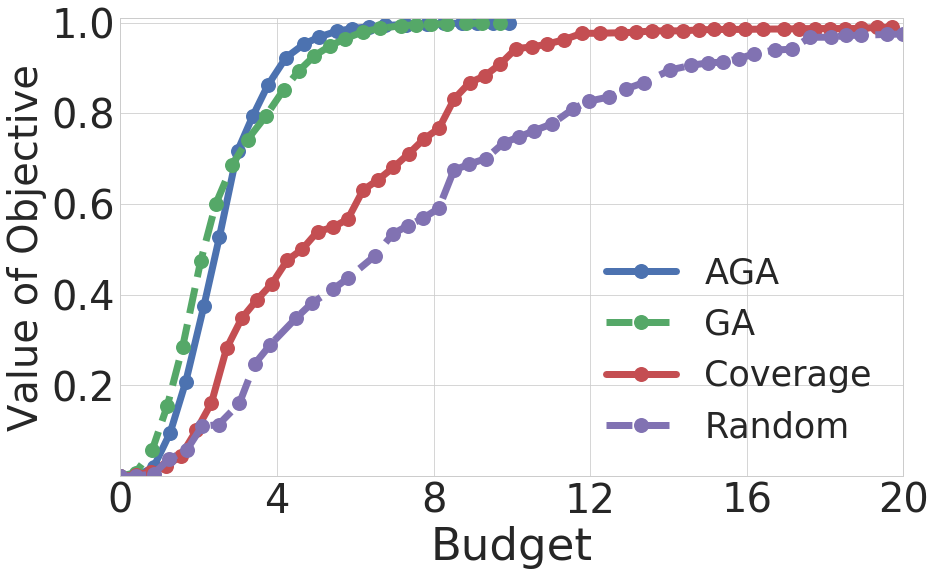

In [97]:
rcParams.update({'figure.autolayout': True})
def_figsize = 56, 20

plt.style.use('seaborn-paper')
sns.set(context='paper', font_scale=1.6)
sns.set_style("whitegrid")

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

df = pd.read_csv('fig3-hetero/AGA', header=None)
X1, Y1 = df[0].tolist(), df[1].tolist()         # Y1: AGA

df = pd.read_csv('fig3-hetero/GA', header=None)
X2, Y2 = df[0].tolist(), df[1].tolist()         # Y2: GA

df = pd.read_csv('fig3-hetero/coverage', header=None)
X3, Y3 = df[0].tolist(), df[1].tolist()         # Y3: coverage

df = pd.read_csv('fig3-hetero/random', header=None)
X4, Y4 = df[0].tolist(), df[1].tolist()         # Y4: random

X1.insert(0, 0), Y1.insert(0, 0)
X2.insert(0, 0), Y2.insert(0, 0)
X3.insert(0, 0), Y3.insert(0, 0)
X4.insert(0, 0), Y4.insert(0, 0)

rcParams['lines.linewidth'] = 7

plt.figure(figsize=(14,9))
#plt.setp(linewidth=4)
plt.plot(X1, Y1, linestyle='-', marker='o', markersize=15)
plt.plot(X2, Y2, linestyle='--', marker='o', markersize=15)
plt.plot(X3, Y3, linestyle='-', marker='o', markersize=15)
plt.plot(X4, Y4, linestyle='--', marker='o', markersize=15)

plt.legend(['AGA','GA', 'Coverage', 'Random'], prop={'size':35})
plt.xlabel('Budget', fontsize=45)
plt.ylabel('Value of Objective', fontsize=40)
x_axis = np.arange(0, 21, 4)
plt.xticks(x_axis)
y_axis = np.arange(0.2, 1.1, 0.2)
plt.yticks(y_axis)
plt.xlim([0, 20])
plt.ylim([0, 1.01])

plt.savefig('fig3-hetero/AGA-vs-baseline.png')
plt.show()

In [98]:
import random

In [107]:
random.sample([1, 2, 3, 4, 5, 6], 2)

[3, 4]

In [132]:
for i in range(100):
    print(random.randint(0, 5), end=' ')

3 5 3 3 4 5 3 4 1 0 0 1 2 5 5 3 4 4 4 1 2 0 5 3 5 1 3 2 1 1 2 1 1 2 3 1 4 1 5 4 0 5 5 4 4 0 5 3 4 2 3 4 0 3 5 1 3 1 2 3 3 5 5 3 3 0 0 3 4 5 2 4 3 3 5 3 2 1 5 3 3 5 0 3 2 4 0 1 3 0 5 5 0 5 0 5 1 2 2 4 